# Importing packages

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Data wrangling - removing uneccessary data and merging to one dataframe

In [3]:
def getData(filename):
    df = pd.read_csv(filename, thousands=',')
    df = df.drop(columns=['Low', 'High', 'Open','Adj Close', "Volume"])
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Date'] = pd.to_datetime(df["Date"].dt.strftime('%Y/%m%/d%'))
    df[df.columns[-1]] = pd.to_numeric(df[df.columns[-1]].replace(',', ''), errors='coerce')
    return df
df = getData('GOGL.csv')

In [14]:
df.tail()

Date  Close   SMA50   SMA200
5048 2020-08-20   4.15  3.9410  4.21170
5049 2020-08-21   4.06  3.9492  4.20295
5050 2020-08-24   4.19  3.9568  4.19655
5051 2020-08-25   4.22  3.9642  4.19000
5052 2020-08-26   4.20  3.9680  4.18345

# Creating moving averages and buy and sell signals

In [4]:
df['SMA50']=df['Close'].rolling(50).mean()
df['SMA200']=df['Close'].rolling(200).mean()
df['Labels'] = 0


for i in range(len(df)):
    if df['SMA50'][i] > df['SMA200'][i] and df['SMA50'][i-1] < df['SMA200'][i-1]:
        df['Labels'][i] = 1
    elif df['SMA50'][i] < df['SMA200'][i] and df['SMA50'][i-1] > df['SMA200'][i-1]:
        df['Labels'][i] = -1
    else:
        df['Labels'][i] = 0

<ipython-input-4-31cce5b206f2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Labels'][i] = 0
<ipython-input-4-31cce5b206f2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Labels'][i] = -1
<ipython-input-4-31cce5b206f2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Labels'][i] = 1


# Calculating profits

In [5]:
#Copying dataframe and creating new columns for calculating returns
profit = (df[(df.values  == 1)|(df.values  == -1 )])
profit['Long_Short'] = 0
profit['Buy_Hold']= 0
profit[''] = 0
#Long/short strategy, when we have a 1 we buy with all we got, when we have 0 we short sell.
for i in range(1, len(profit)):
    if profit['Labels'].iloc[i]==-1:
        profit['Long_Short'].iloc[i] = ((profit['Close'].iloc[i]-profit['Close'].iloc[i-1]) / profit['Close'].iloc[i-1])+profit['Long_Short'].iloc[i-1]
    else:
        profit['Long_Short'].iloc[i] = ((profit['Close'].iloc[i-1]-profit['Close'].iloc[i]) / profit['Close'].iloc[i-1])+profit['Long_Short'].iloc[i-1]

#Buy and hold strategy, we buy in at the same time as the Long/Short and hold till the end
for i in range(1, len(profit)):
    profit['Buy_Hold'].iloc[i] = (profit['Close'].iloc[i]-profit['Close'].iloc[0])/profit['Close'].iloc[0]

<ipython-input-5-53d44b531276>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit['Long_Short'] = 0
<ipython-input-5-53d44b531276>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit['Buy_Hold']= 0
<ipython-input-5-53d44b531276>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [6]:
df.to_csv(r'C:\Users\larsm\OneDrive\NHH\Master\Høst20\Masteroppgave\MA1.csv', index=True)
profit.to_csv(r'C:\Users\larsm\OneDrive\NHH\Master\Høst20\Masteroppgave\MA2.csv', index=True)

In [18]:
#Plotting the returns
ax = profit.plot(x='Date', y= ['Long_Short', 'Buy_Hold', ''], figsize=(16,8))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 


In [7]:
df['SMA50']=df['Close'].rolling(50).mean()
df['SMA200']=df['Close'].rolling(200).mean()
df.head()

Date    Close  SMA50  SMA200
0 2000-07-27  93.7500    NaN     NaN
1 2000-07-28  93.4375    NaN     NaN
2 2000-07-31  93.7500    NaN     NaN
3 2000-08-01  93.7500    NaN     NaN
4 2000-08-02  95.0000    NaN     NaN

In [20]:
def buy_sell(signal):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(0,len(signal)):
    #if sma50 > sma200  then buy else sell
      if signal['SMA50'][i] > signal['SMA200'][i]:
        if flag != 1:
          sigPriceBuy.append(signal['Close'][i])
          sigPriceSell.append(np.nan)
          flag = 1
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
        #print('Buy')
      elif signal['SMA50'][i] < signal['SMA200'][i]:
        if flag != 0:
          sigPriceSell.append(signal['Close'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
        #print('sell')
      else: #Handling nan values
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

In [21]:
#Create a new dataframe
signal = pd.DataFrame(index=df['Close'].index)
signal['Close'] = df['Close']
signal['SMA50'] = df.SMA50
signal['SMA200'] = df.SMA200
signal

Close   SMA50   SMA200
0     93.7500     NaN      NaN
1     93.4375     NaN      NaN
2     93.7500     NaN      NaN
3     93.7500     NaN      NaN
4     95.0000     NaN      NaN
...       ...     ...      ...
5048   4.1500  3.9410  4.21170
5049   4.0600  3.9492  4.20295
5050   4.1900  3.9568  4.19655
5051   4.2200  3.9642  4.19000
5052   4.2000  3.9680  4.18345

[5053 rows x 3 columns]

In [22]:
x = buy_sell(signal)
signal['Buy_Signal_Price'] = x[0]
signal['Sell_Signal_Price'] = x[1]

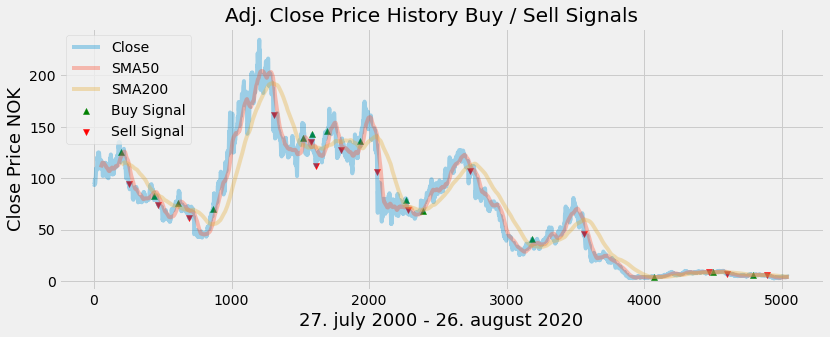

In [15]:
# Visually Show The Stock buy and sell signals
# Create the title 
title = 'Adj. Close Price History Buy / Sell Signals   '
#Get the stocks
my_stocks = signal
ticker = 'Close'
  
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(my_stocks.index, my_stocks['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( my_stocks[ticker],  label=ticker, alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.plot( my_stocks['SMA50'],  label='SMA50', alpha = 0.35)
plt.plot( my_stocks['SMA200'],  label='SMA200', alpha = 0.35)
plt.title(title)
plt.xlabel('27. july 2000 - 26. august 2020',fontsize=18)
plt.ylabel('Close Price NOK',fontsize=18)
plt.legend( loc='upper left')
plt.show()

In [19]:
signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5053 entries, 0 to 5052
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Close              5053 non-null   float64
 1   SMA50              5004 non-null   float64
 2   SMA200             4854 non-null   float64
 3   Buy_Signal_Price   14 non-null     float64
 4   Sell_Signal_Price  14 non-null     float64
dtypes: float64(5)
memory usage: 197.5 KB
